# 🦠 **MiniDatathonF5: Análisis de Datos de Covid-19 en EE.UU.**






## 📊 **Reto**

Este proyecto tiene como objetivo explorar y analizar datos históricos sobre la incidencia del Covid-19 en Estados Unidos, utilizando la API pública y gratuita proporcionada por [The Covid Tracking Project](https://covidtracking.com/data/api). La API ofrece un registro detallado de los datos hasta el año 2021, desglosados por estado.

## 🛠️ **Objetivo**

- Cargar los datos históricos de Covid-19 por estado utilizando Python.
- Realizar una exploración exhaustiva de esos datos.
- Elaborar un informe que destaque las conclusiones y los descubrimientos realizados.
- Contar la historia que los datos revelan sobre la pandemia en EE.UU.

## ⏳ **Plazos**

- El proyecto se llevará a cabo durante los días **19 y 20 de agosto de 2024**.

## 📦 **Entregables**

- Un **repositorio en GitHub** con el trabajo organizado en ramas, incluyendo mensajes de commit claros y descriptivos.
- Un **cuaderno de Jupyter** que contenga el análisis realizado.
- Una **presentación de conclusiones**, que puede ser un documento detallando los hallazgos.

## 🛠️ **Tecnologías a utilizar**

- **Requests** para la interacción con la API.
- **Pandas** para la manipulación y análisis de los datos.
- **Matplotlib**, **Pyplot**, **Seaborn** y **Bokeh** para la visualización de datos.

#Conectar con la API

In [44]:
#Importamos librerías
import requests #Para llamar a la api
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

url='https://api.covidtracking.com/v1/states/daily.json'

df_covid = requests.get(url)

print(df_covid.json())


Output hidden; open in https://colab.research.google.com to view.

In [45]:
#Leer el JSON desde la url
df_covid = pd.read_json(url)

# Convertir a tipo datetime
df = pd.DataFrame(df_covid)

# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

#Mostrar las primeras filas del DataFrame
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


In [46]:
df['inIcuCurrently']

,inIcuCurrently
0,NaN
1,NaN
2,141.0
3,NaN
4,273.0
...,...
20775,NaN
20776,NaN
20777,NaN
20778,NaN


In [47]:
# Saber número de filas y columnas que contiene el df
filas, columnas = df_covid.shape

print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")


El DataFrame tiene 20780 filas y 56 columnas.


In [48]:
# Todas las columnas en lista
list(df)

['date',
 'state',
 'positive',
 'probableCases',
 'negative',
 'pending',
 'totalTestResultsSource',
 'totalTestResults',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'recovered',
 'lastUpdateEt',
 'dateModified',
 'checkTimeEt',
 'death',
 'hospitalized',
 'hospitalizedDischarged',
 'dateChecked',
 'totalTestsViral',
 'positiveTestsViral',
 'negativeTestsViral',
 'positiveCasesViral',
 'deathConfirmed',
 'deathProbable',
 'totalTestEncountersViral',
 'totalTestsPeopleViral',
 'totalTestsAntibody',
 'positiveTestsAntibody',
 'negativeTestsAntibody',
 'totalTestsPeopleAntibody',
 'positiveTestsPeopleAntibody',
 'negativeTestsPeopleAntibody',
 'totalTestsPeopleAntigen',
 'positiveTestsPeopleAntigen',
 'totalTestsAntigen',
 'positiveTestsAntigen',
 'fips',
 'positiveIncrease',
 'negativeIncrease',
 'total',
 'totalTestResultsIncrease',
 'posNeg',
 'dataQualityGrade',
 'deathIncrease',
 'h

#Identificar valores faltantes

In [49]:
# Contar los valores faltantes en cada columna
missing_data = df_covid.isnull().sum()
print(missing_data)


date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
d

<Axes: >

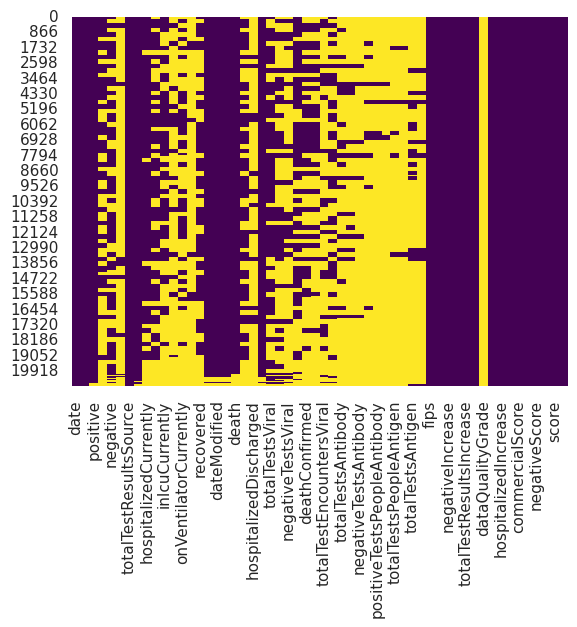

In [50]:
#librería para ver los datos faltantes en las columnas de forma visual
import seaborn as sns
sns.heatmap(df_covid.isnull(), cbar=False, cmap='viridis')


#Identificar valores duplicados

In [51]:
# Contar el número de filas duplicadas
duplicated_rows = df_covid.duplicated().sum()
print(f"Número de filas duplicadas: {duplicated_rows}")


Número de filas duplicadas: 0


#Limpieza datos

In [52]:
#Para limpiar los datos que faltan
#df_covid.dropna(axis=1, inplace=True)


In [53]:
#Seleccionar las columnas que me resultan interesantes para llevar a cabo el estudio
df_columnas_analizadas = df[['date', 'state', 'positive', 'negative', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently', 'recovered', 'death','totalTestResults', 'positiveIncrease', 'deathIncrease', 'hospitalizedIncrease']]
#df_columnas_analizadas = df[['date', 'state', 'positive', 'negative', 'hospitalizedCurrently', 'death','totalTestResults']]
#df=df[columnas_analizadas]

print(df_columnas_analizadas)

            date state  positive   negative  hospitalizedCurrently  \
0     2021-03-07    AK   56886.0        NaN                   33.0   
1     2021-03-07    AL  499819.0  1931711.0                  494.0   
2     2021-03-07    AR  324818.0  2480716.0                  335.0   
3     2021-03-07    AS       0.0     2140.0                    NaN   
4     2021-03-07    AZ  826454.0  3073010.0                  963.0   
...          ...   ...       ...        ...                    ...   
20775 2020-01-17    WA       0.0        NaN                    NaN   
20776 2020-01-16    WA       0.0        NaN                    NaN   
20777 2020-01-15    WA       0.0        NaN                    NaN   
20778 2020-01-14    WA       0.0        NaN                    NaN   
20779 2020-01-13    WA       NaN        NaN                    NaN   

       inIcuCurrently  onVentilatorCurrently  recovered    death  \
0                 NaN                    2.0        NaN    305.0   
1                 NaN  

In [54]:
# Descripción general de los datos
df_columnas_analizadas.describe()

,date,positive,negative,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,totalTestResults,positiveIncrease,deathIncrease,hospitalizedIncrease
count,20780,2.059200e+04,1.329000e+04,17339.000000,11636.000000,9126.000000,1.200300e+04,19930.000000,2.061400e+04,20780.000000,20780.000000,20780.000000
mean,2020-09-02 18:13:30.779595776,1.651560e+05,8.482246e+05,1190.576965,359.621176,151.589305,9.424223e+04,3682.216859,2.186936e+06,1383.849519,24.790712,37.360780
min,2020-01-13 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000e+00,-7757.000000,-201.000000,-12257.000000
25%,2020-06-02 00:00:00,5.753750e+03,5.394125e+04,166.500000,60.000000,29.000000,3.379000e+03,161.250000,1.040498e+05,65.000000,0.000000,0.000000
50%,2020-09-03 00:00:00,4.606450e+04,3.059720e+05,531.000000,172.000000,86.000000,1.761800e+04,1108.000000,6.552670e+05,435.000000,6.000000,0.000000
75%,2020-12-05 00:00:00,1.779580e+05,1.056611e+06,1279.000000,380.000000,185.000000,9.315250e+04,4387.500000,2.264766e+06,1335.250000,24.000000,36.000000
max,2021-03-07 00:00:00,3.501394e+06,1.018694e+07,22851.000000,5225.000000,2425.000000,2.502609e+06,54124.000000,4.964601e+07,71734.000000,2559.000000,16373.000000
std,NaN,3.267852e+05,1.344501e+06,2060.041207,594.831150,207.755157,2.110372e+05,6281.366321,4.436508e+06,3023.558742,60.162742,208.237151


#Diferentes gráficos estudiando la evolución de los casos positivos

##Líneas de Tiempo
Mostrar la evolución de los casos positivos de COVID-19 en diferentes estados de EE.UU. a lo largo del tiempo.
* Figura Interactiva: Este gráfico muestra la evolución de los casos positivos en todos los estados seleccionados. Al pasar el cursor sobre cualquier punto de las líneas, se muestra la fecha exacta y el número de casos positivos.
* Hover Tool: El HoverTool permite ver los detalles del gráfico cuando pasas el cursor sobre las líneas.

In [56]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.palettes import Spectral11
import itertools

# Activar la salida en Jupyter
output_notebook()

# Filtrar y preparar los datos
df['date'] = pd.to_datetime(df['date'])
df_grouped = df.groupby(['date', 'state'])['positive'].sum().reset_index()

# Crear una fuente de datos
source = ColumnDataSource(df_grouped)

# Crear el gráfico
p = figure(x_axis_type='datetime', title='Evolución de Casos Positivos de COVID-19 en EE.UU.',
           height=400, width=900)

# Añadir una línea por cada estado
estados = df['state'].unique()
# Generar una paleta de colores personalizada para más de 20 estados
colors = list(itertools.islice(itertools.cycle(Spectral11), len(estados)))

for i, estado in enumerate(estados):
    estado_df = df_grouped[df_grouped['state'] == estado]
    p.line('date', 'positive', source=ColumnDataSource(estado_df), legend_label=estado, line_width=2, color=colors[i])

# Configuración del hover tool
hover = HoverTool(tooltips=[('Fecha', '@date{%F}'), ('Positivos', '@positive{0,0}'), ('Estado', '@state')],
                  formatters={'@date': 'datetime'})
p.add_tools(hover)

p.legend.location = 'top_left'
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Número de Casos Positivos'

show(p)


##Mapa Coroplético con Plotly
* Mapa Coroplético: Muestra la cantidad de casos positivos en cada estado, con un gradiente de color que indica la intensidad. Es útil para identificar rápidamente los estados más afectados.
* Plotly: Proporciona interactividad y detalles adicionales al hacer zoom o pasar el cursor sobre los estados.

In [57]:
#Visualizar la distribución de casos positivos por estado en un mapa de EE.UU.
import plotly.express as px

# Agrupar los datos por estado y sumar los casos positivos
df_state_sum = df.groupby('state').agg({'positive': 'sum'}).reset_index()

# Crear un mapa coroplético
fig = px.choropleth(df_state_sum, locations='state', locationmode="USA-states", color='positive',
                    color_continuous_scale="Viridis", scope="usa",
                    labels={'positive': 'Casos Positivos'},
                    title="Distribución de Casos Positivos de COVID-19 en EE.UU.")

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.show()


##Histogramas
Mostrar la distribución de casos positivos a lo largo de diferentes estados.
* Muestra cómo se distribuyen los casos positivos entre todos los estados. La línea kde representa una estimación de la densidad de la distribución, lo que ayuda a visualizar la tendencia de los datos.

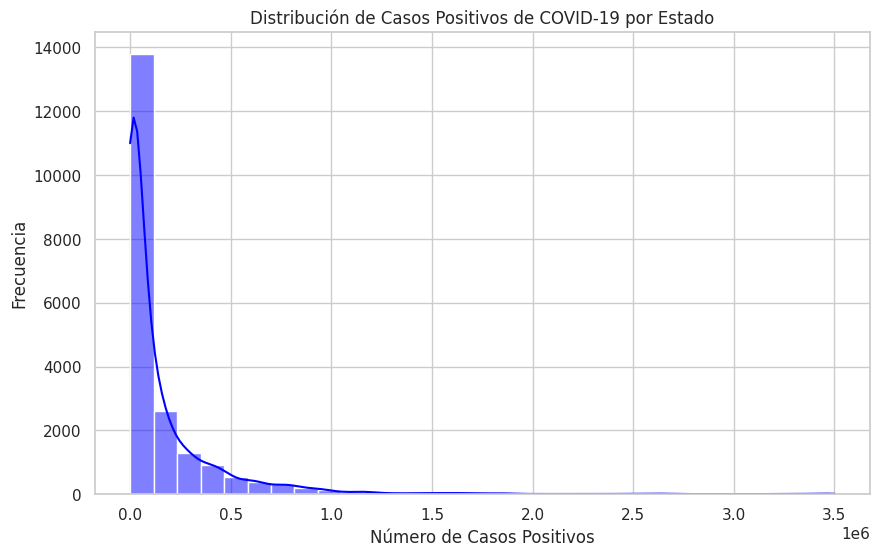

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['positive'], kde=True, bins=30, color='blue')
plt.title('Distribución de Casos Positivos de COVID-19 por Estado')
plt.xlabel('Número de Casos Positivos')
plt.ylabel('Frecuencia')

plt.show()


##Gráficos de Barras Apiladas
Comparar el número de casos positivos, hospitalizados y muertes en diferentes estados.
* Gráfico de Barras Apiladas: Permite comparar múltiples métricas (positivos, hospitalizados, muertes) en diferentes estados de forma clara y visual.
* Seaborn: Facilita la creación de gráficos complejos como las barras apiladas con una sintaxis sencilla.

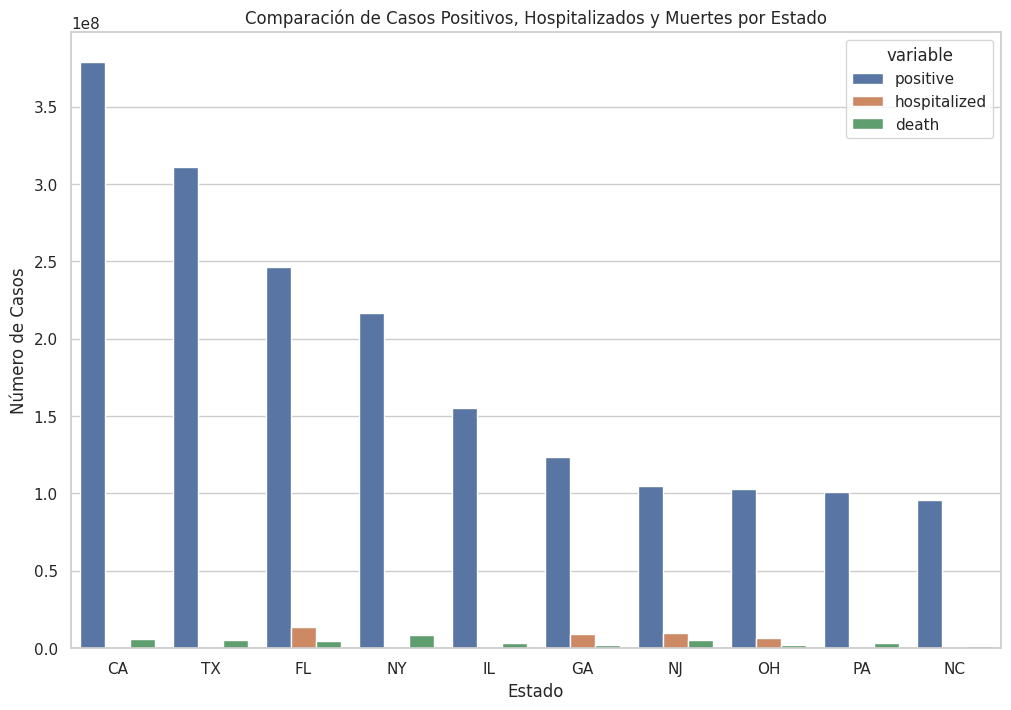

In [59]:
# Filtrar los datos para los estados más afectados
df_top_states = df.groupby('state').agg({'positive': 'sum', 'hospitalized': 'sum', 'death': 'sum'}).reset_index()
df_top_states = df_top_states.sort_values('positive', ascending=False).head(10)

# Crear el gráfico de barras apiladas
df_top_states_melt = df_top_states.melt(id_vars=['state'], value_vars=['positive', 'hospitalized', 'death'])

plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='value', hue='variable', data=df_top_states_melt)
plt.title('Comparación de Casos Positivos, Hospitalizados y Muertes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Casos')

plt.show()


##Gráficos de Tarta (Pie Charts)
Visualizar la proporción de casos positivos por estado.
Gráfico de Tarta: Muestra cómo se distribuyen los casos positivos entre los estados como una proporción del total. Es útil para destacar cuáles estados contribuyen más al total de casos.

In [60]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import cumsum
from math import pi
import itertools
from bokeh.palettes import Spectral11

# Activar la salida en Jupyter
output_notebook()

# Agrupar los datos por estado
df_state_grouped = df.groupby('state')['positive'].sum().reset_index()

# Calcular ángulo y color personalizados
df_state_grouped['angle'] = df_state_grouped['positive']/df_state_grouped['positive'].sum() * 2*pi
colors = list(itertools.islice(itertools.cycle(Spectral11), len(df_state_grouped)))
df_state_grouped['color'] = colors

# Crear el gráfico de tarta
p = figure(title="Distribución de Casos Positivos de COVID-19 por Estado", toolbar_location=None,
           tools="hover", tooltips="@state: @positive", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='state', source=df_state_grouped)

p.axis.visible = False
p.grid.visible = False

show(p)



##Box Plots
Útiles para visualizar la distribución de los datos y detectar posibles valores atípicos.
* sns.boxplot: Utilizamos la función boxplot de seaborn para crear los diagramas de caja. Cada caja representa la distribución de los datos por estado.
* Rotation de etiquetas: Las etiquetas de los estados se rotan 90 grados para facilitar la lectura, especialmente si hay muchos estados.

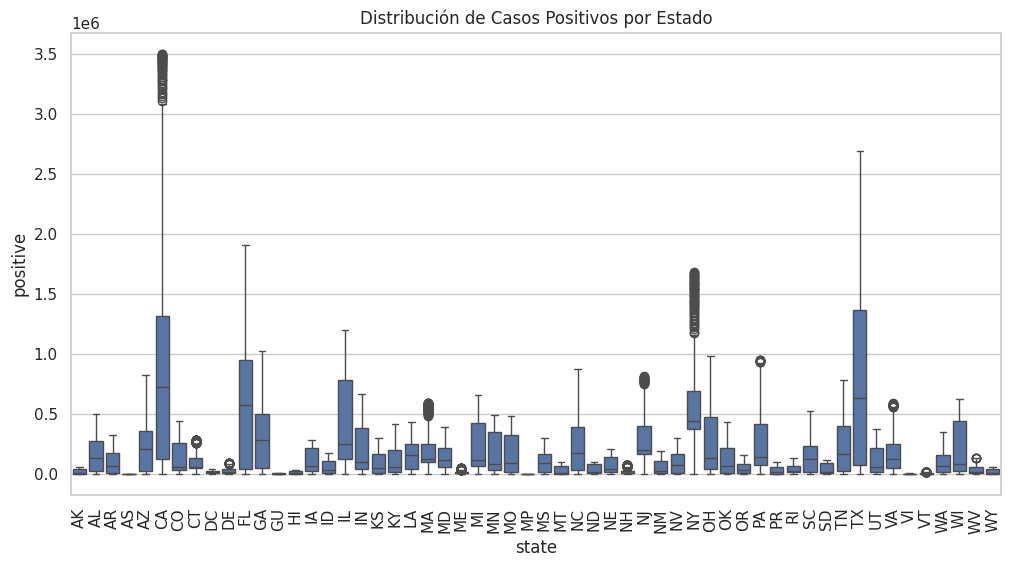

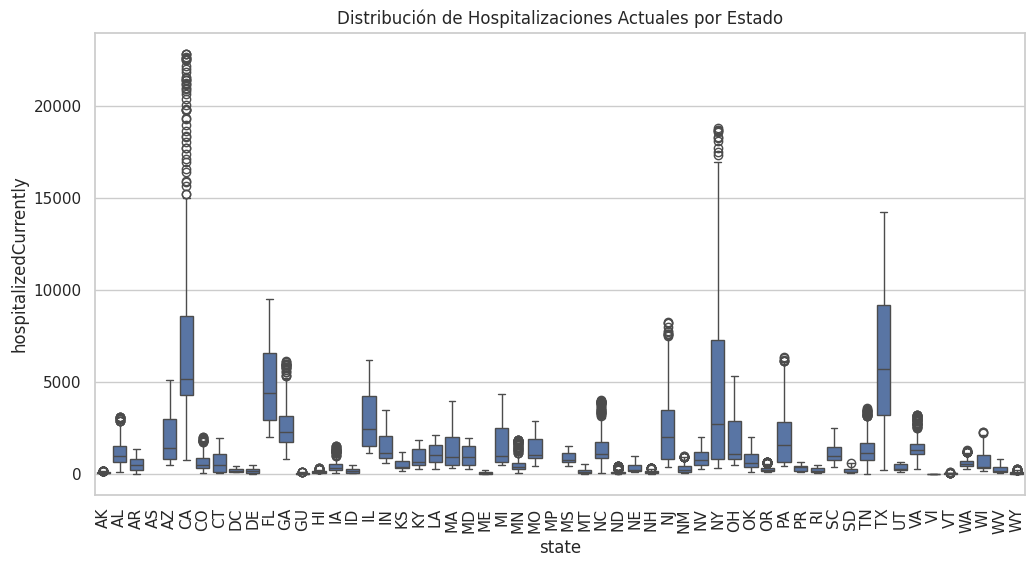

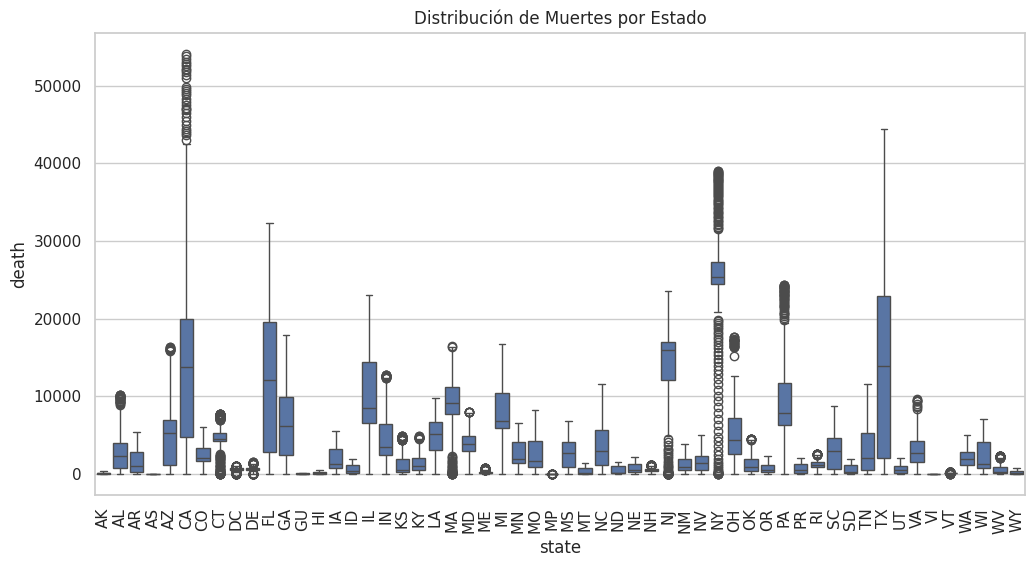

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
df_filtrado = df[['state', 'positive', 'negative', 'hospitalizedCurrently', 'death']]

# Crear un gráfico de box plot para los casos positivos
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='positive', data=df_filtrado)
plt.title('Distribución de Casos Positivos por Estado')
plt.xticks(rotation=90)
plt.show()

# Crear un gráfico de box plot para las hospitalizaciones actuales
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='hospitalizedCurrently', data=df_filtrado)
plt.title('Distribución de Hospitalizaciones Actuales por Estado')
plt.xticks(rotation=90)
plt.show()

# Crear un gráfico de box plot para las muertes
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='death', data=df_filtrado)
plt.title('Distribución de Muertes por Estado')
plt.xticks(rotation=90)
plt.show()


##Gráficos de Dispersión (Scatter Plots)
Analizar la relación entre dos variables.
* ColumnDataSource: Estructuramos los datos en una ColumnDataSource para que sean fácilmente accesibles para los gráficos en Bokeh.
* HoverTool: El HoverTool se configura para mostrar la información relevante al pasar el cursor sobre los puntos de dispersión.
* Gridplot: Usamos gridplot para organizar múltiples gráficos de dispersión en una cuadrícula.

In [62]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.layouts import gridplot

# Activar la salida en Jupyter
output_notebook()

# Crear la fuente de datos
source = ColumnDataSource(df)

# Gráfico de dispersión de Casos Positivos vs. Hospitalizaciones Actuales
p1 = figure(title="Positivos vs. Hospitalizaciones Actuales", height=400, width=400)
p1.scatter('positive', 'hospitalizedCurrently', source=source)
p1.xaxis.axis_label = 'Casos Positivos'
p1.yaxis.axis_label = 'Hospitalizaciones Actuales'

# Gráfico de dispersión de Casos Positivos vs. Muertes
p2 = figure(title="Positivos vs. Muertes", height=400, width=400)
p2.scatter('positive', 'death', source=source)
p2.xaxis.axis_label = 'Casos Positivos'
p2.yaxis.axis_label = 'Muertes'

# Agregar herramientas de hover
hover = HoverTool(tooltips=[("Estado", "@state"), ("Positivos", "@positive"), ("Hospitalizados", "@hospitalizedCurrently"), ("Muertes", "@death")])
p1.add_tools(hover)
p2.add_tools(hover)

# Mostrar los gráficos en un grid
grid = gridplot([[p1, p2]])
show(grid)


Output hidden; open in https://colab.research.google.com to view.

##Matriz de Correlación
Visualizar las relaciones entre las diferentes variables en tu conjunto de datos.

-Valores cercanos a 1: Indican una correlación positiva fuerte entre dos variables (cuando una aumenta, la otra también tiende a aumentar).

-Valores cercanos a -1: Indican una correlación negativa fuerte (cuando una aumenta, la otra tiende a disminuir).

-Valores cercanos a 0: Indican poca o ninguna correlación entre las variables.

                       positive  negative  hospitalizedCurrently  \
positive               1.000000  0.885633               0.722737   
negative               0.885633  1.000000               0.596864   
hospitalizedCurrently  0.722737  0.596864               1.000000   
inIcuCurrently         0.668597  0.375010               0.978545   
onVentilatorCurrently  0.504675  0.277562               0.916589   
death                  0.880995  0.893446               0.640680   

                       inIcuCurrently  onVentilatorCurrently     death  
positive                     0.668597               0.504675  0.880995  
negative                     0.375010               0.277562  0.893446  
hospitalizedCurrently        0.978545               0.916589  0.640680  
inIcuCurrently               1.000000               0.972712  0.575446  
onVentilatorCurrently        0.972712               1.000000  0.467690  
death                        0.575446               0.467690  1.000000  


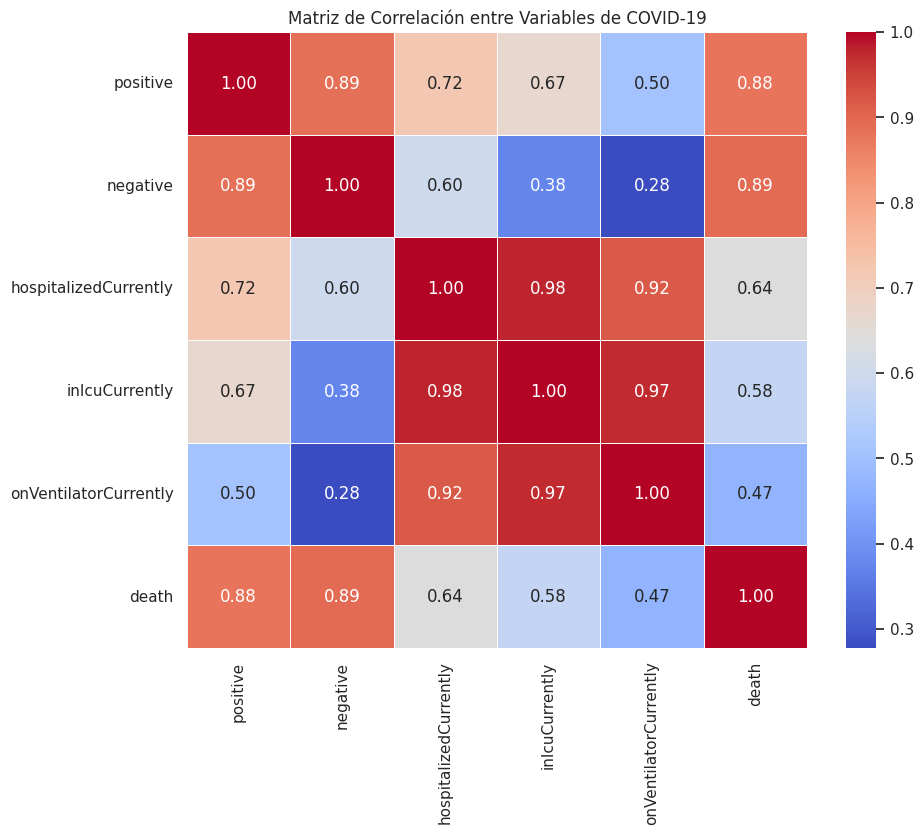

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
columnas_interes = ['positive', 'negative', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently', 'death']

# Crear un DataFrame filtrado con las columnas de interés
df_filtrado = df[columnas_interes]

# Calcular la matriz de correlación
matriz_correlacion = df_filtrado.corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)
# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables de COVID-19')
plt.show()


#Evolución de Casos Positivos y Muertes

In [75]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.palettes import Category20

# Activar la salida en Jupyter
output_notebook()

# Filtrar datos para los estados más afectados
estados_seleccionados = df['state'].unique()[:20]
df_filtrado = df[df['state'].isin(estados_seleccionados)]

# Crear la figura
p = figure(x_axis_type="datetime", title="Evolución de Casos Positivos y Muertes en Estados Unidos",
           height=400, width=900)

# Colores para cada estado
colors = Category20[20]

# Graficar la evolución de casos positivos y muertes
for i, estado in enumerate(estados_seleccionados):
    df_estado = df_filtrado[df_filtrado['state'] == estado]

    # Crear una fuente de datos para cada estado
    source = ColumnDataSource(data={
        'date': df_estado['date'],
        'positive': df_estado['positive'],
        'death': df_estado['death'],
        'state': [estado] * len(df_estado)  # Añadir el nombre del estado
    })

    p.line('date', 'positive', source=source, color=colors[i], legend_label=estado, line_width=2)
    p.scatter('date', 'death', source=source, color=colors[i], size=4)

# Configurar leyendas y herramientas
p.legend.location = "top_left"
p.add_tools(HoverTool(
    tooltips=[("Estado", "@state"), ("Positivos", "@positive"), ("Muertes", "@death"), ("Fecha", "@date{%F}")],
    formatters={'@date': 'datetime'},
    mode='vline'
))

# Mostrar el gráfico
show(p)


#Comparación de Hospitalizaciones, UCI y Ventiladores

In [65]:
#Gráfico de Barras Apiladas: compara el número de personas hospitalizadas, en la UCI y en ventiladores en un momento dado.
from bokeh.plotting import figure, show
from bokeh.transform import dodge
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

# Agrupar por estado y calcular promedios
df_avg = df.groupby('state')[['hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently']].mean().reset_index()

# Configurar los datos para el gráfico
source = ColumnDataSource(df_avg)

# Crear figura
p = figure(x_range=df_avg['state'], height=400, title="Comparación de Hospitalizaciones, UCI y Ventiladores por Estado")

# Graficar barras
p.vbar(x=dodge('state', -0.25, range=p.x_range), top='hospitalizedCurrently', width=0.2, source=source, color=Spectral6[0], legend_label="Hospitalizados")
p.vbar(x=dodge('state', 0.0, range=p.x_range), top='inIcuCurrently', width=0.2, source=source, color=Spectral6[1], legend_label="En UCI")
p.vbar(x=dodge('state', 0.25, range=p.x_range), top='onVentilatorCurrently', width=0.2, source=source, color=Spectral6[2], legend_label="En Ventilador")

# Configurar leyenda
p.legend.location = "top_right"
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 1.2

# Mostrar el gráfico
show(p)


#Distribución de Casos Totales y Pruebas Totales

In [66]:
#Gráfico de Barras Horizontal:compara la cantidad total de casos positivos con el número total de pruebas realizadas por estado.
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap

# Agrupar por estado
df_sum = df.groupby('state')[['positive', 'totalTestResults']].sum().reset_index()

# Crear figura
p = figure(y_range=df_sum['state'], height=800, width=900, title="Comparación de Casos Positivos y Pruebas Totales por Estado")

# Graficar barras horizontales
p.hbar(y='state', right='positive', height=0.4, source=df_sum, color='navy', legend_label="Casos Positivos")
p.hbar(y='state', right='totalTestResults', height=0.2, source=df_sum, color='orange', legend_label="Pruebas Totales")

# Configurar leyenda y etiquetas
p.legend.location = "center_right"
p.xaxis.axis_label = "Número Total"
p.yaxis.axis_label = "Estado"

# Mostrar el gráfico
show(p)


#Comparación de Incrementos Diarios

In [76]:
#Gráfico de Líneas:mostrará los incrementos diarios de casos positivos, muertes y hospitalizaciones por estado.
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.palettes import Category20c

output_notebook()  # Para mostrar el gráfico en Jupyter Notebook

# Crear figura
p = figure(x_axis_type="datetime", title="Incrementos Diarios de Casos Positivos, Muertes y Hospitalizaciones",
           height=400, width=900)

# Colores para cada estado
colors = Category20c[20]

# Graficar la evolución de incrementos
for i, estado in enumerate(estados_seleccionados):
    df_estado = df_filtrado[df_filtrado['state'] == estado]

    # Crear un ColumnDataSource con la columna del nombre del estado
    source = ColumnDataSource(data={
        'date': df_estado['date'],
        'positiveIncrease': df_estado['positiveIncrease'],
        'deathIncrease': df_estado['deathIncrease'],
        'hospitalizedIncrease': df_estado['hospitalizedIncrease'],
        'estado': [estado] * len(df_estado)  # Columna con el nombre del estado
    })

    p.line('date', 'positiveIncrease', source=source, color=colors[i], legend_label=f"Positivos {estado}", line_width=2)
    p.line('date', 'deathIncrease', source=source, color=colors[i], legend_label=f"Muertes {estado}", line_dash="4 4", line_width=2)
    p.line('date', 'hospitalizedIncrease', source=source, color=colors[i], legend_label=f"Hospitalizaciones {estado}", line_dash="dotdash", line_width=2)

# Configurar leyenda y herramientas
p.legend.location = "top_left"
hover = HoverTool(tooltips=[("Estado", "@estado"), ("Incremento", "$y"), ("Fecha", "@date{%F}")],
                  formatters={'@date': 'datetime'}, mode='vline')
p.add_tools(hover)

# Mostrar el gráfico
show(p)


#Explicación:
* Evolución de Casos Positivos y Muertes: El gráfico de líneas permite visualizar cómo han evolucionado los casos positivos y las muertes a lo largo del tiempo. Es útil para identificar tendencias y picos en la pandemia.

* omparación de Hospitalizaciones, UCI y Ventiladores: El gráfico de barras apiladas compara el número de personas hospitalizadas, en UCI y en ventiladores por estado, lo cual es esencial para entender la presión sobre el sistema de salud.

* Distribución de Casos Totales y Pruebas Totales: Este gráfico muestra cuántos casos positivos se han detectado en relación con el número total de pruebas realizadas. Ayuda a comprender la tasa de positividad en cada estado.

* Comparación de Incrementos Diarios: El gráfico de líneas permite analizar cómo varían los incrementos diarios de casos, muertes y hospitalizaciones, lo cual es crucial para identificar brotes repentinos o mejorar las estrategias de mitigación.

#Primeras pruebas con gráficos(a modo ejemplo)

##Comparación entre Estados


<ipython-input-68-60178c5347a4>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




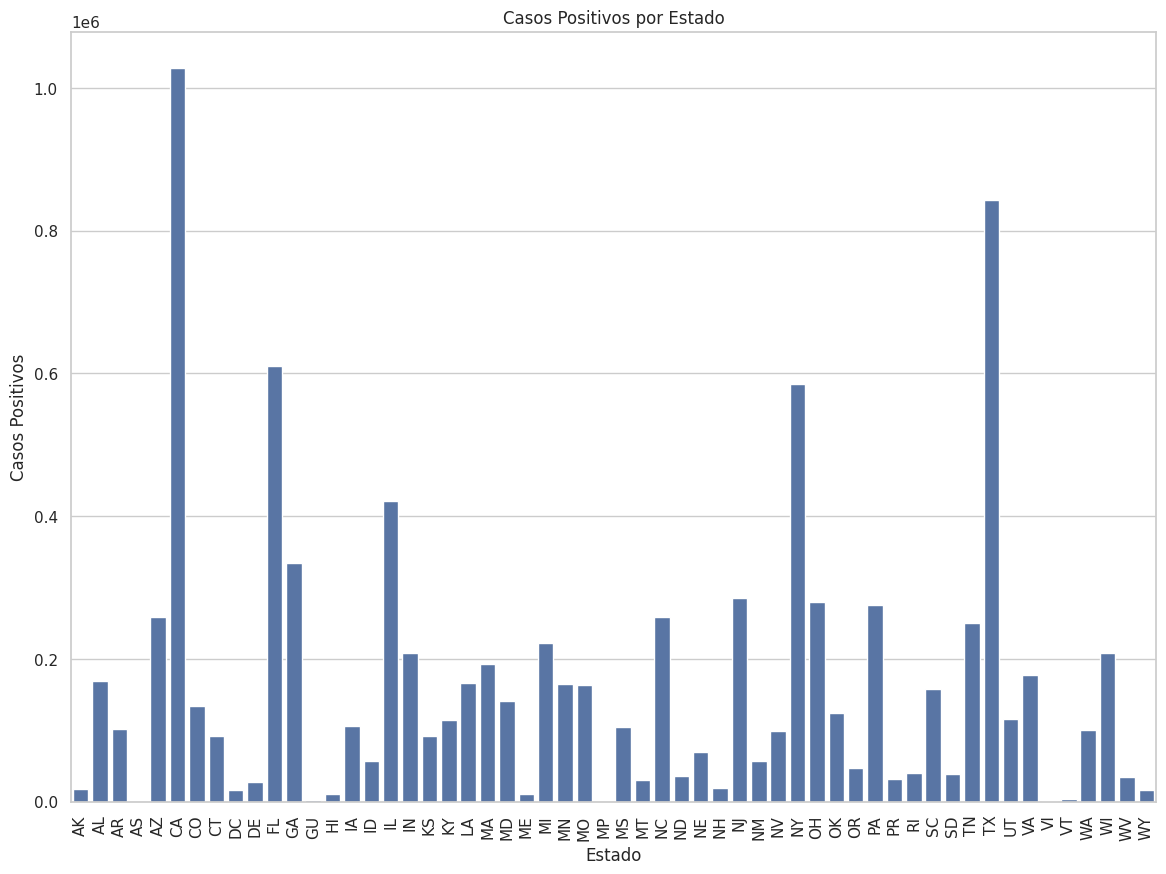

In [68]:
#Comparación de Casos Positivos y Muertes por Estado
plt.figure(figsize=(14, 10))
sns.barplot(data=df, x='state', y='positive', ci=None)
plt.title('Casos Positivos por Estado')
plt.xlabel('Estado')
plt.ylabel('Casos Positivos')
plt.xticks(rotation=90)
plt.show()


In [69]:
#Evolución de Casos Positivos de COVID-19 en Estados Unidos
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.palettes import Spectral11

# Obtenemos la lista de todos los estados únicos en los datos
states = df['state'].unique()

# Configuración para mostrar gráficos en Jupyter Notebook
output_notebook()

# Crear la figura, ajustando 'height' y 'width'
p = figure(x_axis_type="datetime", title="Evolución de Casos Positivos de COVID-19 en Estados Unidos",
           height=400, width=900)

# Configurar etiquetas de los ejes
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Casos Positivos'
p.grid.grid_line_alpha = 0.3

# Usar la paleta de colores para las líneas
colors = Spectral11

# Graficar la evolución de casos positivos para cada estado
for i, state in enumerate(states):
    state_data = df[df['state'] == state]
    p.line(state_data['date'], state_data['positive'], color=colors[i % len(colors)],
           legend_label=state, line_width=2)

# Configurar la leyenda
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Añadir la herramienta de hover para mostrar detalles al pasar el puntero
hover = HoverTool()
hover.tooltips = [("Estado", "@legend_label"), ("Fecha", "@x{%F}"), ("Positivos", "@y")]
hover.formatters = {'@x': 'datetime'}
p.add_tools(hover)

# Mostrar el gráfico
show(p)



In [70]:
from math import pi
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Category20c
from bokeh.models import ColumnDataSource

# Agrupar datos por estado y sumar los casos positivos
df_grouped = df.groupby('state')['positive'].sum().reset_index()

# Calcular el ángulo de cada porción de la tarta
df_grouped['angle'] = df_grouped['positive']/df_grouped['positive'].sum() * 2*pi

# Asignar colores reutilizando la paleta si es necesario
df_grouped['color'] = [Category20c[20][i % 20] for i in range(len(df_grouped))]

# Configuración para mostrar gráficos en Jupyter Notebook
output_notebook()

# Crear la gráfica de tarta
p = figure(height=350, title="Distribución de Casos Positivos de COVID-19 por Estado", toolbar_location=None, tools="hover", tooltips="@state: @positive", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='state', source=ColumnDataSource(df_grouped))

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

# Mostrar la gráfica
show(p)


<ipython-input-71-6b2c7401c991>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




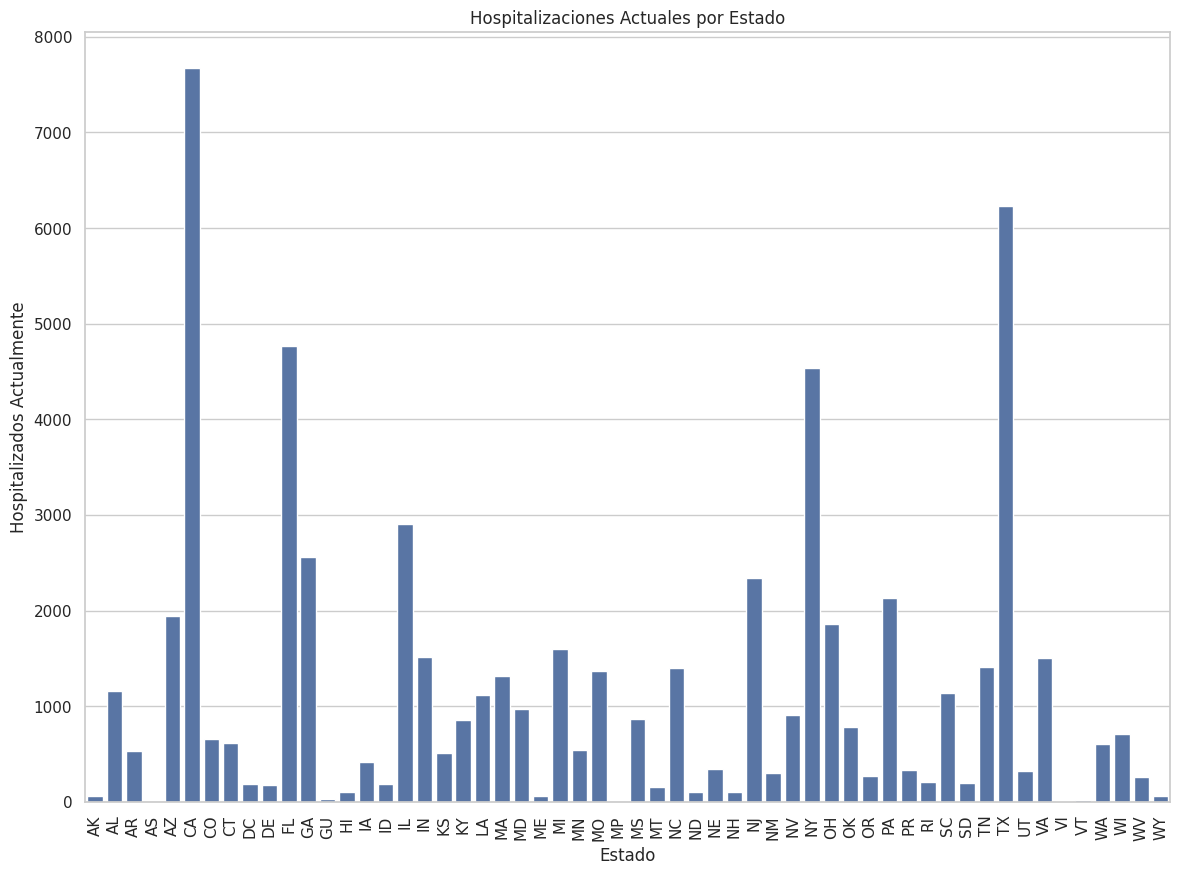

In [71]:
#Comparación Hospitalizaciones
plt.figure(figsize=(14, 10))
sns.barplot(data=df, x='state', y='hospitalizedCurrently', ci=None)
plt.title('Hospitalizaciones Actuales por Estado')
plt.xlabel('Estado')
plt.ylabel('Hospitalizados Actualmente')
plt.xticks(rotation=90)
plt.show()



##Incremento Diario

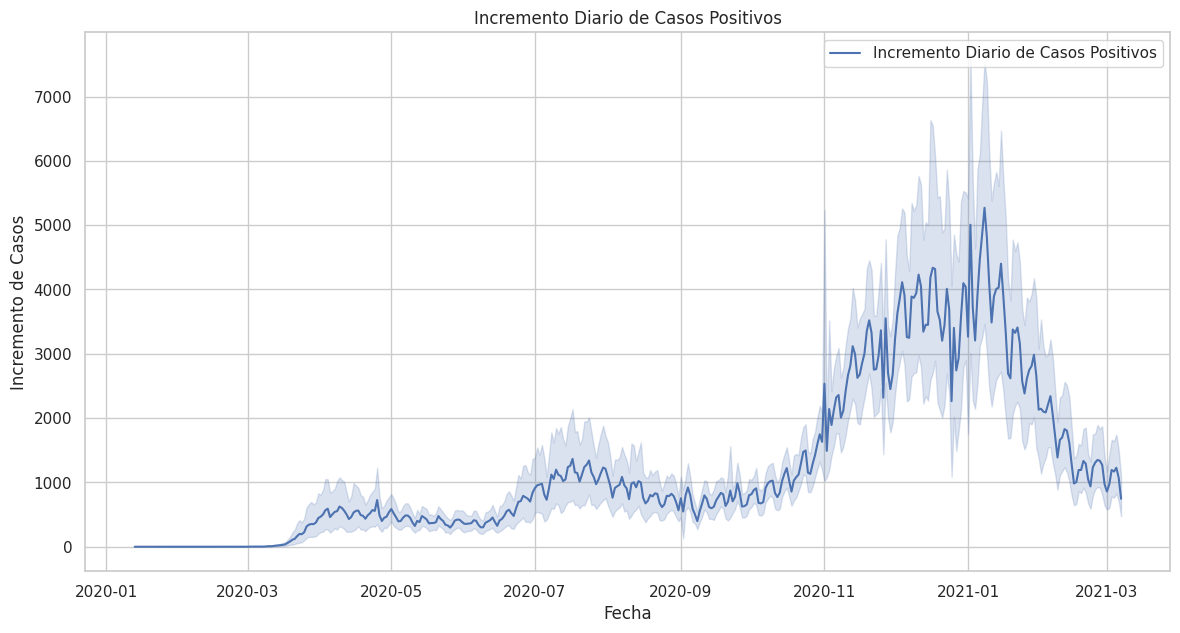

In [72]:
#Incremento Diario de Casos Positivos
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='positiveIncrease', label='Incremento Diario de Casos Positivos')
plt.title('Incremento Diario de Casos Positivos')
plt.xlabel('Fecha')
plt.ylabel('Incremento de Casos')
plt.show()


##Relación entre variables

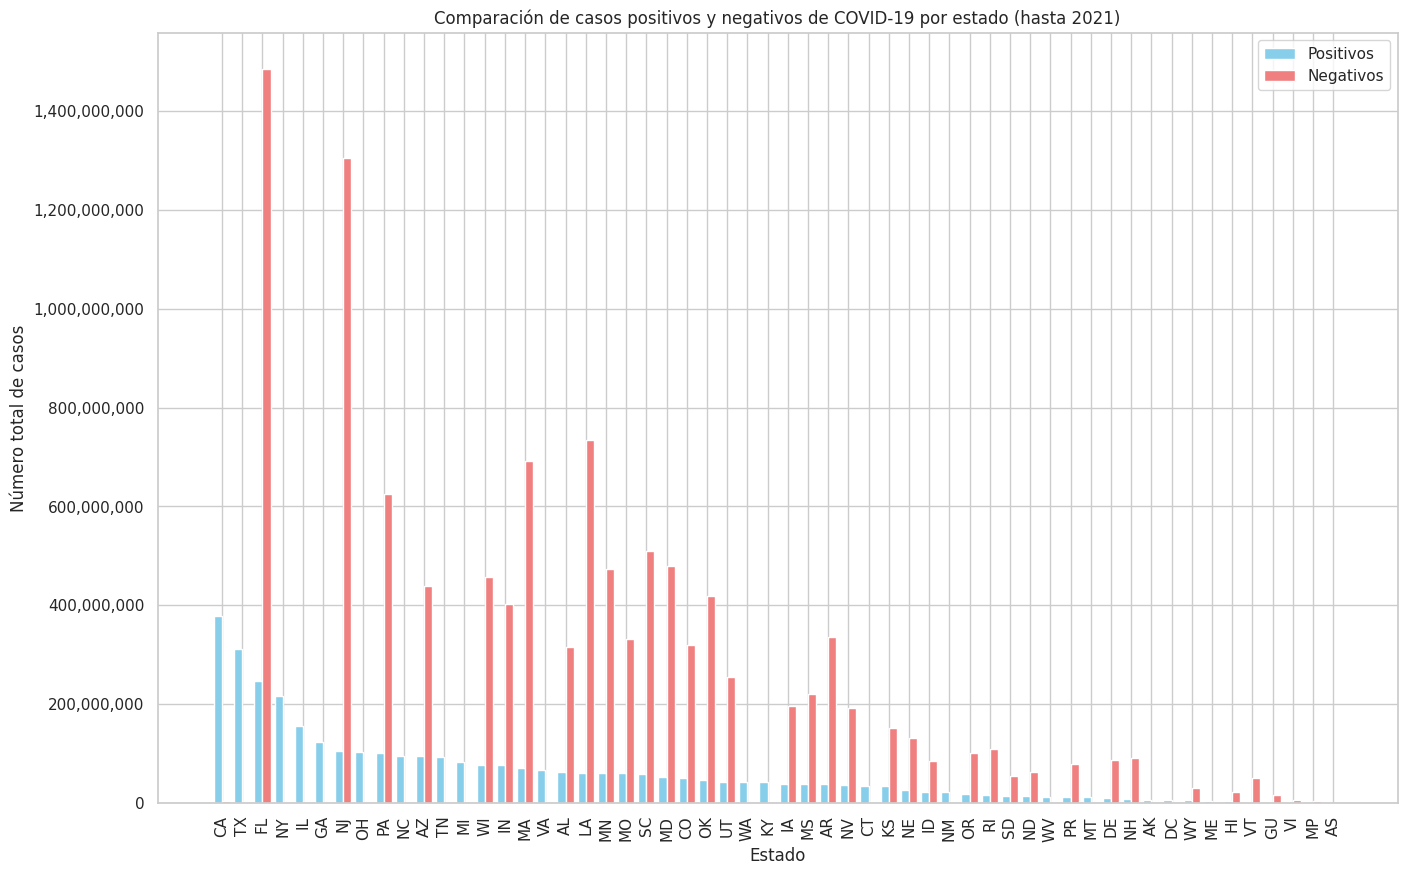

In [73]:
# Agrupar por estado y sumar los casos positivos y negativos
state_summary = df.groupby('state')[['positive', 'negative']].sum().sort_values(by='positive', ascending=False)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(16, 10))

# Crear un rango para la posición de los estados
indices = np.arange(len(state_summary))

# Ancho de las barras
bar_width = 0.4

# Crear las barras para los casos positivos y negativos
plt.bar(indices, state_summary['positive'], bar_width, label='Positivos', color='skyblue')
plt.bar(indices + bar_width, state_summary['negative'], bar_width, label='Negativos', color='lightcoral')

# Añadir títulos y etiquetas
plt.title('Comparación de casos positivos y negativos de COVID-19 por estado (hasta 2021)')
plt.xlabel('Estado')
plt.ylabel('Número total de casos')
plt.xticks(indices + bar_width / 2, state_summary.index, rotation=90)  # Posicionar etiquetas del eje x

# Modificar el formato del eje y para que muestre números enteros en miles o millones
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend()

# Mostrar el gráfico
plt.show()

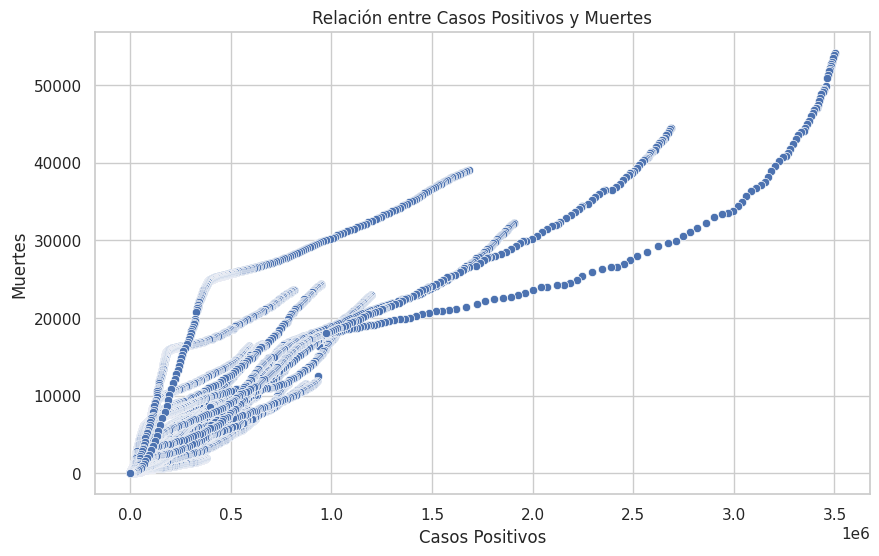

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='positive', y='death')
plt.title('Relación entre Casos Positivos y Muertes')
plt.xlabel('Casos Positivos')
plt.ylabel('Muertes')
plt.show()


##Evolución de Positivos y Muertes

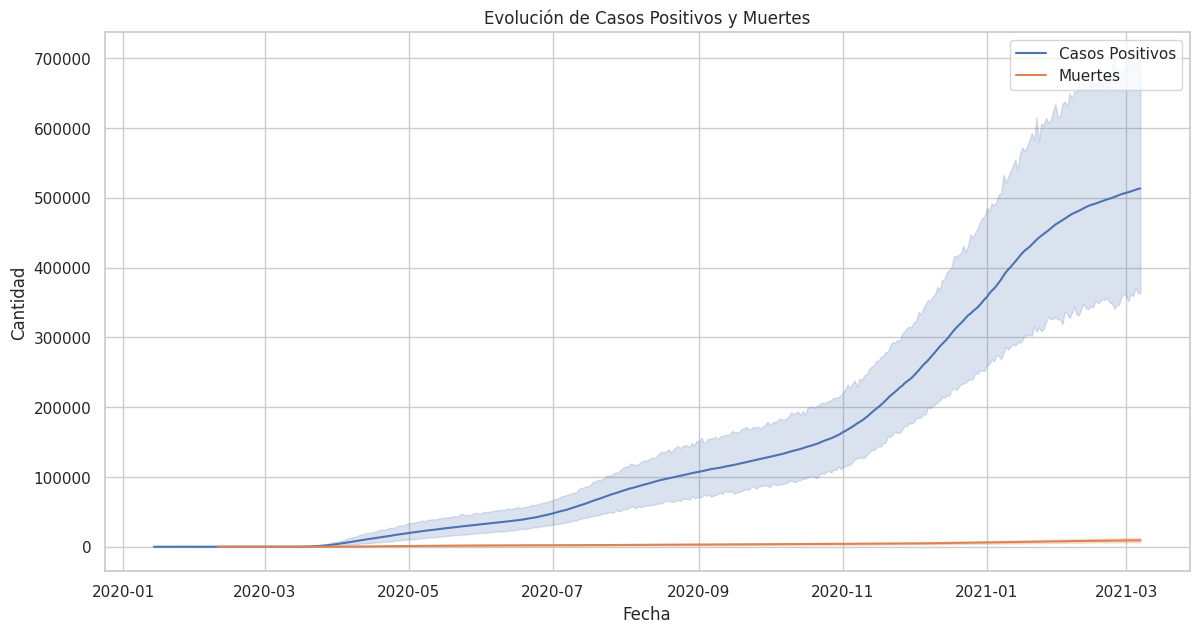

In [55]:
#Casos Positivos y Muertes a lo largo del tiempo

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='positive', label='Casos Positivos')
sns.lineplot(data=df, x='date', y='death', label='Muertes')
plt.title('Evolución de Casos Positivos y Muertes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()
